In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [ ]:
from data.source.pg_experiment import get_pg_experiment_dataset, AUDIO_PATH
import polars as pl

df_pron, df_tone = get_pg_experiment_dataset(".wav")

In [38]:
df_pron

shape: (12_852, 7)
┌────────────┬───────┬─────────┬──────────────────────┬────────────┬────────┬────────┐
│ id_student ┆ value ┆ word_id ┆ rec_path             ┆ univ       ┆ gender ┆ mother │
│ ---        ┆ ---   ┆ ---     ┆ ---                  ┆ ---        ┆ ---    ┆ ---    │
│ i64        ┆ i64   ┆ str     ┆ str                  ┆ str        ┆ str    ┆ str    │
╞════════════╪═══════╪═════════╪══════════════════════╪════════════╪════════╪════════╡
│ 8          ┆ 0     ┆ a0      ┆ stageI/8/a0.wav      ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 9          ┆ 1     ┆ a0      ┆ stageI/9/a0.wav      ┆ PG_CS_MA_1 ┆ f      ┆ polish │
│ 10         ┆ 0     ┆ a0      ┆ stageI/10/a0.wav     ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 11         ┆ 1     ┆ a0      ┆ stageI/11/a0.wav     ┆ PG_CS_MA_1 ┆ f      ┆ polish │
│ 21         ┆ 0     ┆ a0      ┆ stageI/21/a0.wav     ┆ PG_CS_MA_1 ┆ f      ┆ polish │
│ …          ┆ …     ┆ …       ┆ …                    ┆ …          ┆ …      ┆ …      │
│ 1455       ┆ 0     ┆ q18     ┆ stageII/1455/q18.wav ┆ MBI_2024   ┆ f      ┆ polish │
│ 1456       ┆ 0     ┆ q18     ┆ stageII/1456/q18.wav ┆ MBI_2024   ┆ m      ┆ polish │
│ 1460       ┆ 1     ┆ q18     ┆ stageII/1460/q18.wav ┆ MBI_2024   ┆ m      ┆ polish │
│ 1462       ┆ 1     ┆ q18     ┆ stageII/1462/q18.wav ┆ MBI_2024   ┆ f      ┆ polish │
│ 1469       ┆ 0     ┆ q18     ┆ stageII/1469/q18.wav ┆ CLES_UMK4  ┆ f      ┆ polish │
└────────────┴───────┴─────────┴──────────────────────┴────────────┴────────┴────────┘

In [6]:
filtered = df_pron.filter(
    (pl.col("word_id").str.starts_with("a")) &
    (pl.col("id_student") == 10)
)
filtered
# Stage I recordings from one person

shape: (12, 7)
┌────────────┬───────┬─────────┬────────────────────┬────────────┬────────┬────────┐
│ id_student ┆ value ┆ word_id ┆ rec_path           ┆ univ       ┆ gender ┆ mother │
│ ---        ┆ ---   ┆ ---     ┆ ---                ┆ ---        ┆ ---    ┆ ---    │
│ i64        ┆ i64   ┆ str     ┆ str                ┆ str        ┆ str    ┆ str    │
╞════════════╪═══════╪═════════╪════════════════════╪════════════╪════════╪════════╡
│ 10         ┆ 0     ┆ a0      ┆ stageI/10/a0.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 1     ┆ a1      ┆ stageI/10/a1.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 0     ┆ a2      ┆ stageI/10/a2.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 1     ┆ a3      ┆ stageI/10/a3.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 0     ┆ a4      ┆ stageI/10/a4.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ …          ┆ …     ┆ …       ┆ …                  ┆ …          ┆ …      ┆ …      │
│ 10         ┆ 1     ┆ a7      ┆ stageI/10/a7.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 1     ┆ a8      ┆ stageI/10/a8.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 1     ┆ a9      ┆ stageI/10/a9.wav   ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 0     ┆ a10     ┆ stageI/10/a10.wav  ┆ PG_CS_MA_1 ┆ m      ┆ polish │
│ 10         ┆ 1     ┆ a100    ┆ stageI/10/a100.wav ┆ PG_CS_MA_1 ┆ m      ┆ polish │
└────────────┴───────┴─────────┴────────────────────┴────────────┴────────┴────────┘

In [ ]:
import os
from IPython.display import Audio

def play_wav(rec_path: str):
    # Normalize path to current OS
    wav_path = os.path.join(AUDIO_PATH, *rec_path.split("/"))
    return Audio(filename=wav_path)

In [ ]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def show_mel(path, sr=22050, n_mels=128):
    full_path = os.path.join(AUDIO_PATH, *path.split("/"))
    waveform, sample_rate = torchaudio.load(full_path)

    if sample_rate != sr:
        resampler = T.Resample(orig_freq=sample_rate, new_freq=sr)
        waveform = resampler(waveform)
        sample_rate = sr

    mel_spectrogram = T.MelSpectrogram(sample_rate=sample_rate, n_mels=n_mels)(waveform)
    mel_db = T.AmplitudeToDB()(mel_spectrogram)

    plt.figure(figsize=(8, 3))
    plt.imshow(mel_db[0].numpy(), aspect="auto", origin="lower")
    plt.title("Mel Spectrogram: " + path)
    plt.ylabel("Mel Bin")
    plt.xlabel("Frame")
    plt.colorbar(label="dB")
    plt.tight_layout()
    plt.show()



In [ ]:
import torchaudio
import torchaudio.transforms as T
import os

def trim_and_save(path: str, out_sr: int = 22050, db_threshold: float = 60.0):
    full_path = os.path.join(AUDIO_PATH, *path.split("/"))
    waveform, sample_rate = torchaudio.load(full_path)

    # Resample if needed
    if sample_rate != out_sr:
        waveform = T.Resample(orig_freq=sample_rate, new_freq=out_sr)(waveform)
        sample_rate = out_sr

    # Trim silence (default: leading + trailing silence below threshold dB)
    trimmed_waveform= torchaudio.functional.vad(
        waveform, sample_rate=sample_rate, trigger_level=db_threshold
    )

    # If VAD fails (no voice), fallback to manual trim
    if trimmed_waveform.numel() == 0:
        trimmed_waveform = torchaudio.transforms.Vad(sample_rate)(waveform)

    # Save with _t suffix
    new_path = full_path.replace(".wav", "_t.wav")
    torchaudio.save(new_path, trimmed_waveform, sample_rate)
    print(f"Saved trimmed file: {new_path}")


In [36]:
def trim_compare(path:str):
    show_mel(path)
    display(play_wav(path))
    trim_and_save(path=path)
    new_path = path.replace(".wav", "_t.wav")
    show_mel(new_path)
    display(play_wav(new_path))


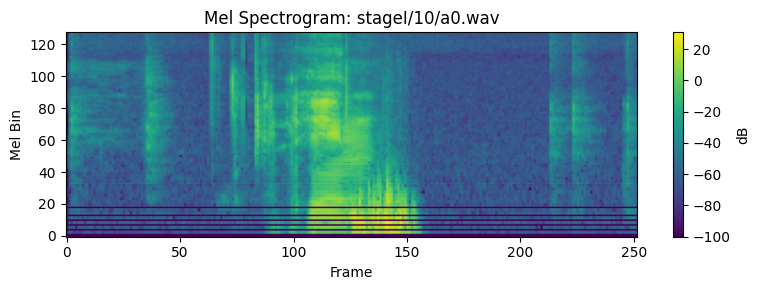

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a0_t.wav


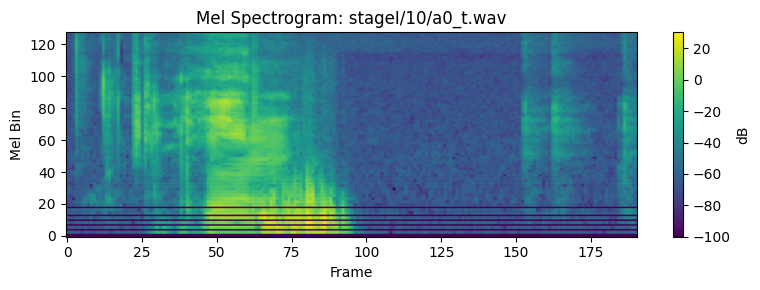

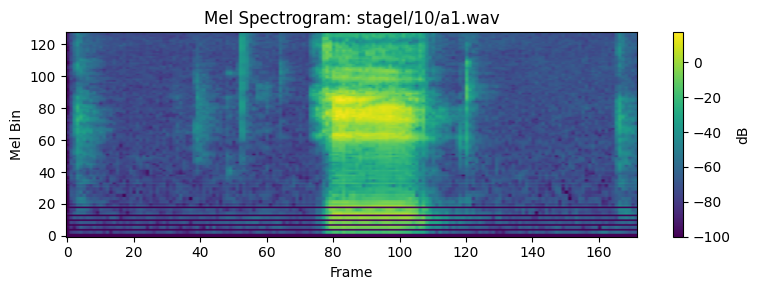

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a1_t.wav


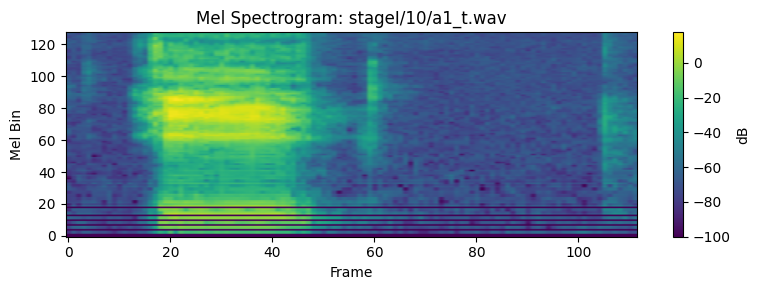

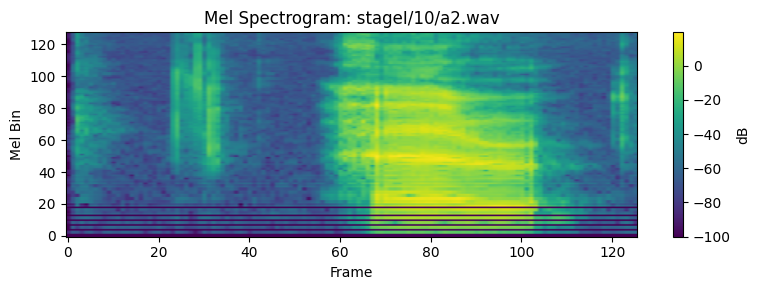

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a2_t.wav


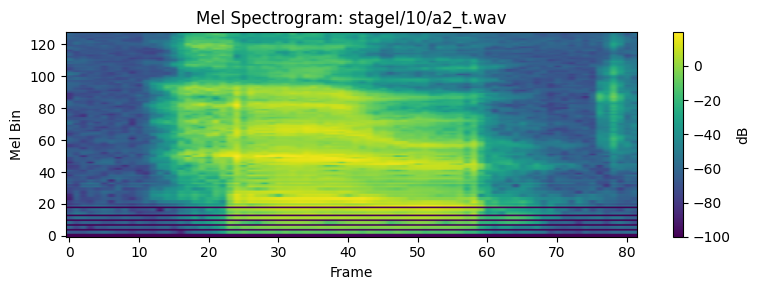

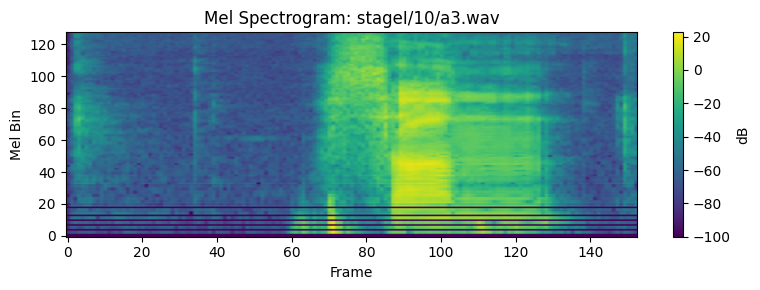

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a3_t.wav


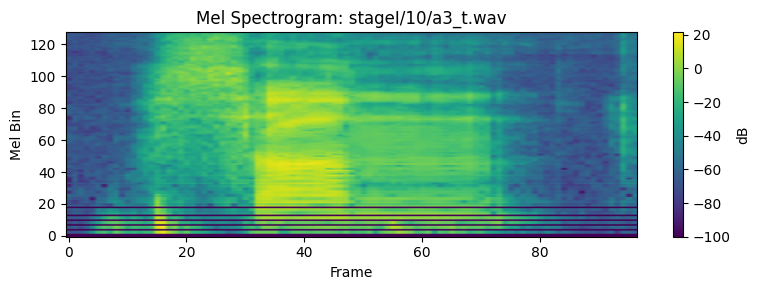

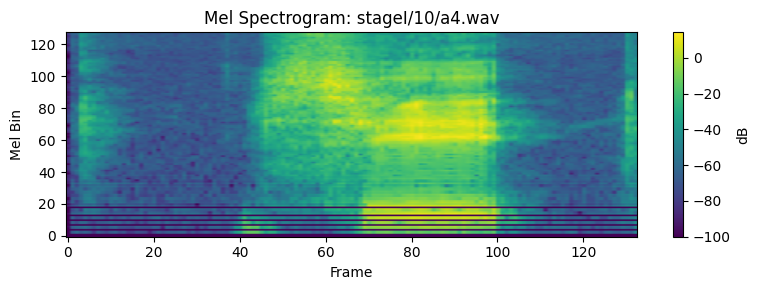

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a4_t.wav


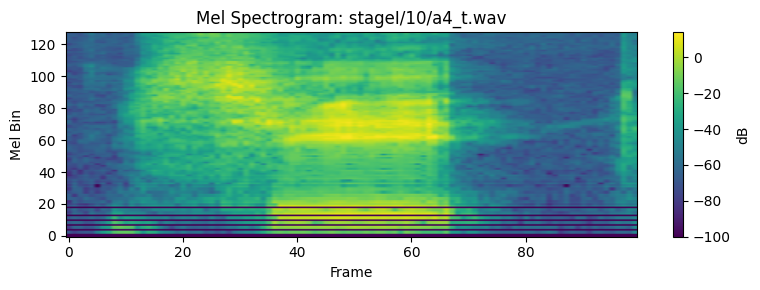

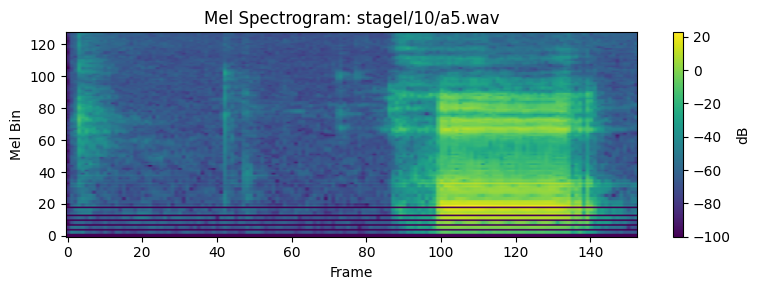

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a5_t.wav


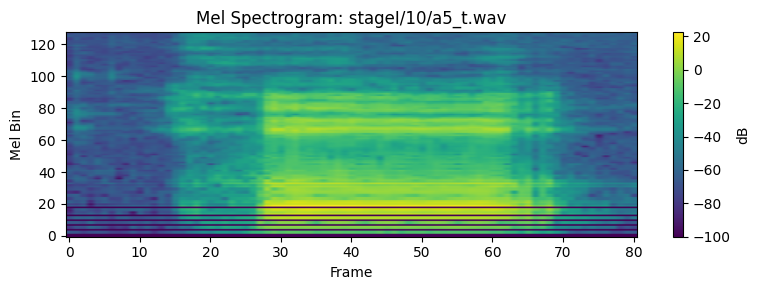

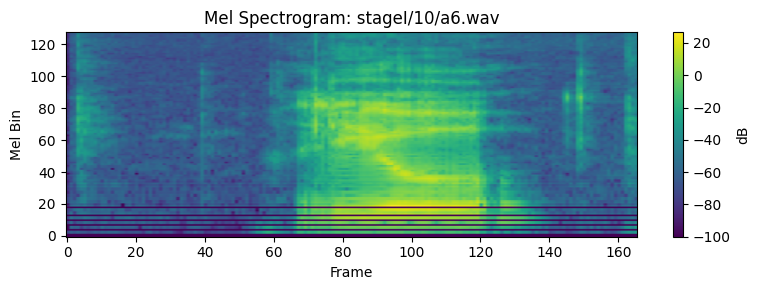

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a6_t.wav


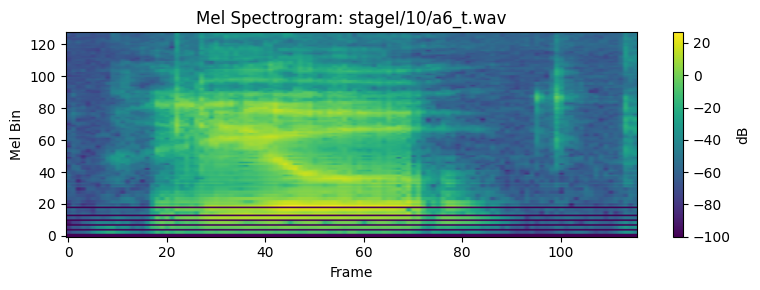

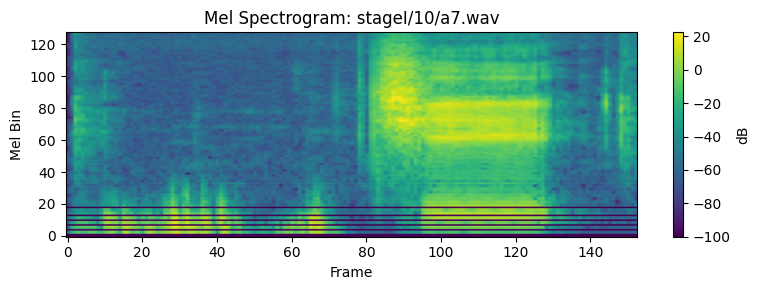

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a7_t.wav


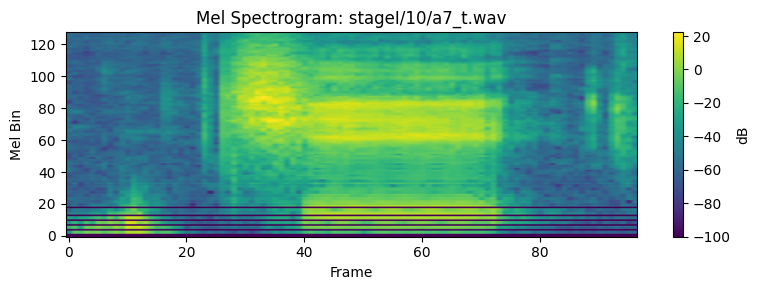

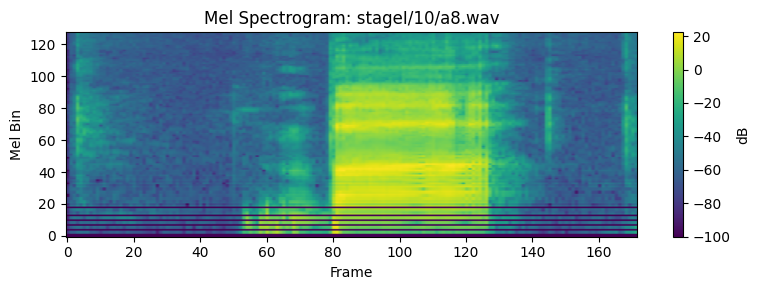

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a8_t.wav


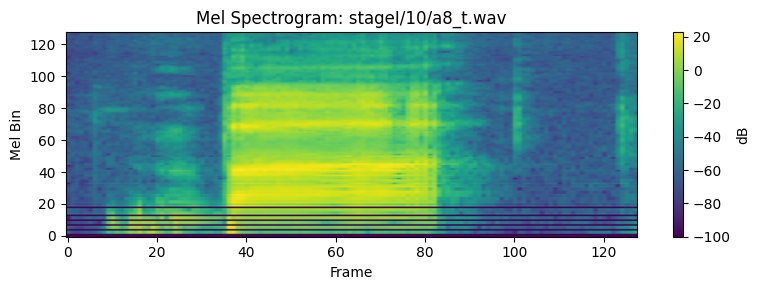

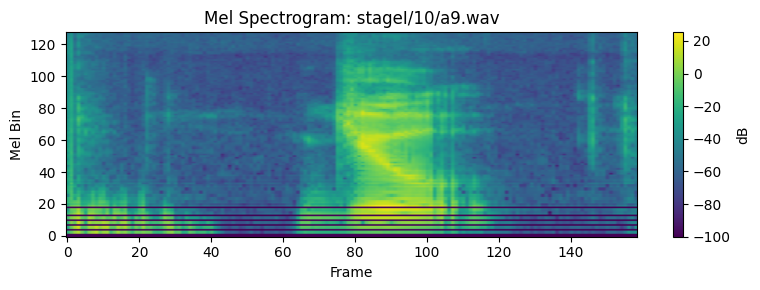

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a9_t.wav


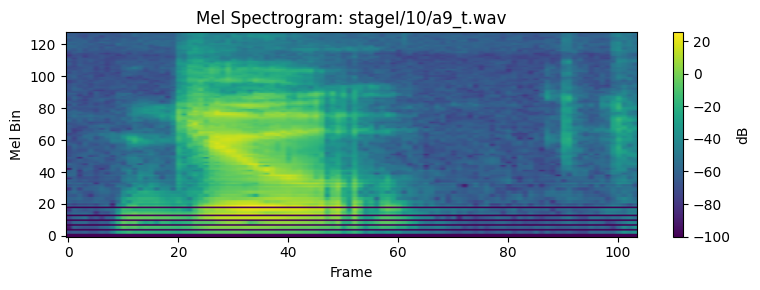

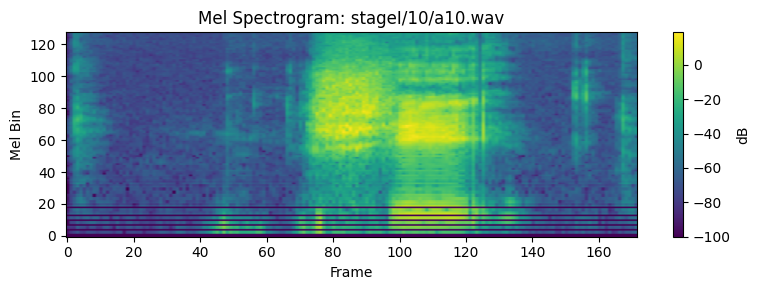

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a10_t.wav


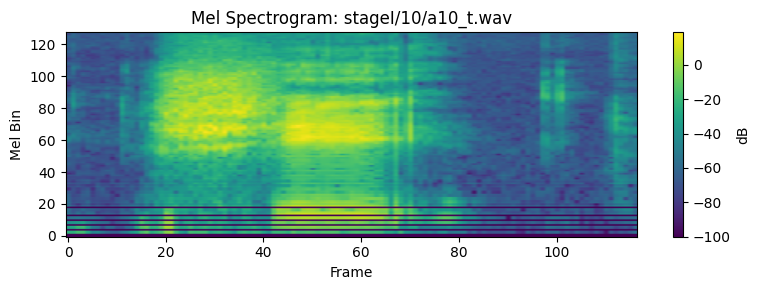

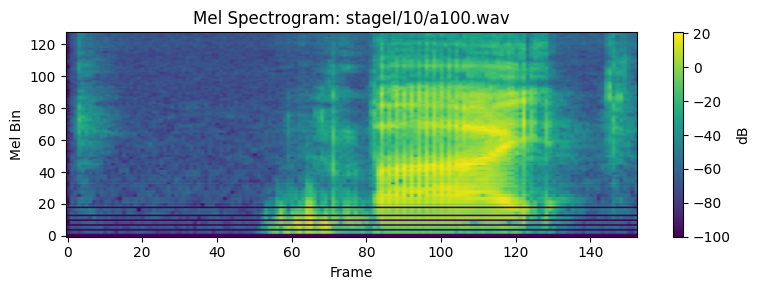

Saved trimmed file: c:\Users\fisch\Documents\studiaMagisterskie\sem1\zespolowyProjektBadawczy\repo\Mandarin_Pronunciation_Recognition_Project\src\data\..\..\..\pg_dataset\recordings\stageI\10\a100_t.wav


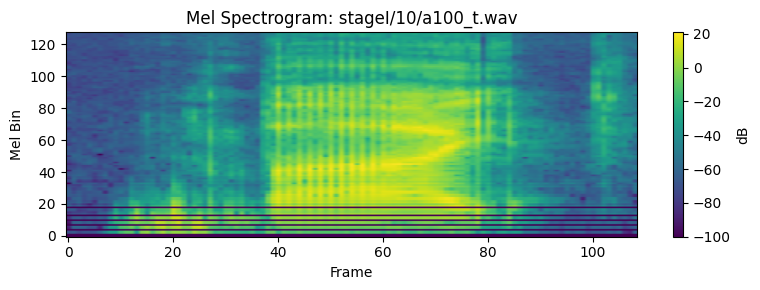

In [37]:
for path in filtered.select("rec_path").to_series():
    trim_compare(path)